## Problem 1

### (a)
Extract the weights and biases of the trained network from mnist_network_params.hdf5.
The file has 6 keys corresponding to numpy arrays W1, b1, W2, b2, W3, b3. You may want
to check their dimensions by using the ‘shape’ attribute of a numpy array.

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with h5py.File('mnist_network_params.hdf5', 'r') as hf:
    W1 = hf['W1'][:]
    b1 = hf['b1'][:]
    W2 = hf['W2'][:]
    b2 = hf['b2'][:]
    W3 = hf['W3'][:]
    b3 = hf['b3'][:]
for i in (W1, b1, W2, b2, W3, b3):
    print('the shape is {}'.format(i.shape))

the shape is (200, 784)
the shape is (200,)
the shape is (100, 200)
the shape is (100,)
the shape is (10, 100)
the shape is (10,)


### (b)
The file mnist_testdata.hdf5 contains 10,000 images in the key ‘xdata’ and their corresponding
labels in the key ‘ydata’. Extract these. Note that each image is 784-dimensional
and each label is one-hot 10-dimensional. So if the label for an image is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
it means the image depicts a 3.

In [3]:
with h5py.File('mnist_testdata.hdf5', 'r') as hf:
    xdata = hf['xdata'][:]
    ydata = hf['ydata'][:]
print(xdata.shape)
print(ydata.shape)

(10000, 784)
(10000, 10)


### (c)
Write functions for calculating ReLU and softmax

In [6]:
def  ReLU(x):
    return max(0,x);
def  softmax(x):
    a = []
    for i in range(len(x)):
        a.append(np.exp(x[i]) / sum(np.exp(x)))
    return a;

### (d)
Using numpy, program a MLP that takes a 784-dimensional input image and calculates its
10-dimensional output. Use ReLU activation for the 2 hidden layers and softmax for the
output layer.

In [21]:
def MLP(x):
    a1 = [ReLU(np.dot(W1[i],x)+b1[i]) for i in range(200)]
    a2 = [ReLU(np.dot(W2[i],a1)+b2[i]) for i in range(100)]
    a3 = [ReLU(np.dot(W3[i],a2)+b3[i]) for i in range(10)]
    output = softmax(a3)
    return pd.Series(output);

### (e)
Compare the output with the true label from ‘ydata’. The input is correctly classified if the
position of the maximum element in the MLP output matches with the position of the 1 in
ydata. Find the total number of correctly classified images in the whole set of 10,000. You
should get 9790 correct.

In [8]:
from sklearn.metrics import accuracy_score
ytrue = [pd.Series(ydata[i]).idxmax() for i in range(10000)]
ypred = [MLP(x) for x in xdata]
# calculate the correctly classification
accuracy_score(ytrue,ypred)*10000

9790.0

In [3]:
output = []

for idx in range(0, len(xdata)):
    o3 = MLP(xdata[idx])
    
    output.append({
      "activations": o3.tolist(),
      "index": idx,
      "classification": int(o3.idxmax())
    })

import json
print("AUTOGRADE: %s" % (json.dumps(output)))

### (f)
Sample some cases with correct classification and some with incorrect classification. Visually
inspect them. For those that are incorrect, is the correct class obvious to you? You can use
matplotlib for visualization:

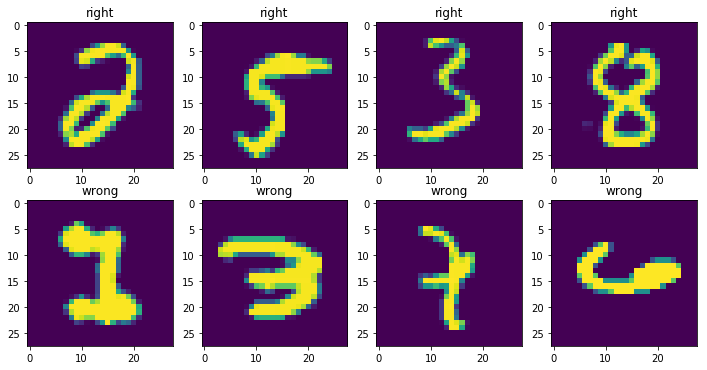

In [43]:
import random 
correct_index = [i for i in range(10000) if ypred[i] == ytrue[i]]
wrong_index = [i for i in range(10000) if ypred[i] != ytrue[i]]
random.seed(123)
xsample_correct = [xdata[i] for i in sample(correct_index,4)]
xsample_wrong = [xdata[i] for i in sample(wrong_index,4)]
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize = (12,6))
ax = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i in range(4):
    ax[i].imshow(xsample_correct[i].reshape(28,28))
    ax[i].set_title('right')
for i in range(4):
    ax[i+4].imshow(xsample_wrong[i].reshape(28,28))
    ax[i+4].set_title('wrong')
#plt.show()

## Problem2

We assume that certain patterns and their variations will frequently occur in humanly generated random number sequences.

## Problem3

## 1.a  
**Show that E($v_n(u)z_n(u)$) = E($v_n(u)y_n(u)$) so that the Wiener filter for estimating   y_n(u) and z_n(u) is the same and ˆzn = ˆyn.**

Proof:

Because $z_n(u) = y_n(u) + q_n(u)$, $q_n(u)$ is also iid, Gaussian with zero mean and variance $σ_q^2$, so E($q_n(u)$) = 0.Also, $v_n(u) = [x_n(u), x_{n−1}(u), x_{n−2}(u)]^t$

So, E($v_n(u)z_n(u)$) = E($v_n(u)y_n(u)$) + E($v_n(u)q_n(u)$),

E($v_n(u)q_n(u)$) = E($x_n(u)q_n(u) + x_{n−1}(u)q_n(u) + x_{n−2}(u)q_n(u)$) = 0 (independent)

So E($v_n(u)z_n(u)$) = E($v_n(u)y_n(u)$)

## 1.b 
**Show that $R_{xz}[m] = R_{xy}[m] = E \{x_n(u)z_{n+m}(u)\} = h_m.$ **

Proof:

Because $R_{xz}[m] = E \{x_n(u)z_{n+m}(u)\}$ and $R_{xy}[m] = E \{x_n(u)y_{n+m}(u)\}$ and $z_n(u) = y_n(u) + q_n(u) = h_0x_n(u) + h_1x_{n−1}(u) + h_2x_{n−2}(u) + q_n(u)$

so, $R_{xz}[m] = E \{x_n(u)z_{n+m}(u)\} = E \{x_n(u)(y_{n+m}(u)+q_{n+m}(u))\} = E\{x_n(u)y_{n+m}(u)\}+E\{x_n(u)q_{n+m}(u)\}$

Also, we know that $x_n(u)$ is a sequence of iid, standard Gaussians and $q_n(u)$ is also iid, Gaussian with zero mean and variance $σ_q^2$
so, $E\{x_n(u)q_{n+m}(u)\} = E\{x_n(u)\}E\{q_{n+m}(u)\}$ = 0

$R_{xz}[m] = E \{x_n(u)z_{n+m}(u)\} = E \{x_n(u)(h_0x_{n+m}(u) + h_0x_{n+m−1}(u) + h_2x_{n+m−2}(u) + q_{n+m}(u))\} = E \{h_0x_n(u)x_{n+m}(u)\} + E \{h_1x_n(u)x_{n+m−1}(u)\} + E \{h_2x_n(u)x_{n+m−2}(u)\} + E \{x_n(u)q_{n+m}(u))\} $

if m = 0, then $E \{h_0x_n(u)x_{n+m}(u)\} + E \{h_1x_n(u)x_{n+m−1}(u)\} + E \{h_2x_n(u)x_{n+m−2}(u)\} + E \{x_n(u)q_{n+m}(u))\} = E \{h_0x_n(u)^2\} + E \{h_1x_n(u)x_{n−1}(u)\} + E \{h_2x_n(u)x_{n−2}(u)\} + E \{x_n(u)q_n(u))\} = h_0 = h_m$

if m = 1 then $E \{h_0x_n(u)x_{n+m}(u)\} + E \{h_1x_n(u)x_{n+m−1}(u)\} + E \{h_2x_n(u)x_{n+m−2}(u)\} + E \{x_n(u)q_{n+m}(u))\} = E \{h_0x_n(u)x_{n+1}(u)\} + E \{h_1x_n(u)^2\} + E \{h_2x_n(u)x_{n−1}(u)\} + E \{x_n(u)q_{n+1}(u))\} = h_1 = h_m$

if m = 2, then $E \{h_0x_n(u)x_{n+m}(u)\} + E \{h_1x_n(u)x_{n+m−1}(u)\} + E \{h_2x_n(u)x_{n+m−2}(u)\} + E \{x_n(u)q_{n+m}(u))\} = E \{h_0x_n(u)x_{n+2}(u)\} + E \{h_1x_n(u)x_{n+1}(u)\} + E \{h_2x_n(u)^2\} + E \{x_n(u)q_{n+2}(u))\} = h_2 = h_m$

In all, $R_{xz}[m] = E\{x_n(u)z_{n+m}(u)\} = R_{xy}[m] = h_m$

## 1.c 
**Find the (3 × 3) matrix $R_{v_n}$ and show that is is not a function of n.**

$x_n(u)$ is a sequence of iid, standard Gaussians so,$E\{x_n(u)\} = 0$ and $E\{x_n(u)^2\} = 1$

We know that $v_n(u) = [x_n(u), x_{n−1}(u), x_{n−2}(u)]^t$. So $R_{v_n} = \begin{bmatrix}E\{x_n(u)^2\} & E\{x_n(u)x_{n−1}(u)\} & E\{x_n(u)x_{n−2}(u)\} \\ E\{x_n(u)x_{n−1}(u)\} & E\{x_{n−1}(u)^2\} & E\{x_{n−1}x_{n−2}(u)\} \\ E\{x_n(u)x_{n−2}(u)\} & E\{x_{n−1}(u)x_{n−2}(u)\} & E\{x_{n−2}(u)^2\}\end{bmatrix}$ = $\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$ 

## 1.d 
**Use the above results to find $r_n = E \{v_n(u)y_n(u)\} = E \{v_n(u)z_n(u)\}$ and show it is not a function of n.**

We know that $v_n(u) = [x_n(u), x_{n−1}(u), x_{n−2}(u)]^t$
So, $r_n = E \{v_n(u)y_n(u)\} = [E \{x_n(u)y_n(u)\}, E \{x_{n−1}(u)y_n(u)\}, E \{x_{n−2}(u)y_n(u)\}]^t$

$E \{x_n(u)y_n(u)\} = E \{h_0x_n(u)^2 + h_1x_n(u)x_{n−1}(u) + h_2x_n(u)x_{n−2}(u)\} = E \{h_0x_n(u)^2\} = h_0$, similar for the other two terms

So, $r_n = \begin{bmatrix}h_0  \\ h_1   \\ h_2  \end{bmatrix}$

## 1.e
**Find the Wiener filter (LMMSE) filter taps $w_{lmmse}$. Compute this numerically for SNRs of 3 and 10 dB.**

For the Wiener filter (LMMSE), $w_{lmmse} = R_v^{-1}r_{vz} = \begin{bmatrix}h_0  \\ h_1   \\ h_2  \end{bmatrix}$

## 1.f 
 **What is the LMMSE – i.e., the residual mean squared error for the Wiener filter? Compute this numerically for SNRs of 10 and 3 dB.**
** Do this for both the case where the Wiener filter is used to estimate zn(u) and yn(u) – what is the difference?**

(1) Estimating $z_n(u)$

LMMSE =  $σ_z^2 - r_{vz}^tR_v^{-1}r_{vz}$ = $E\{z_n(u)^2\} = h_0^2 + h_1^2 + h_2^2 + σ_q^2 - (h_0^2 + h_1^2 + h_2^2) = σ_q^2 = \frac{1}{SNR}$ 
For SNR is 3 dB, $σ_q^2 = \frac{1}{10^{0.3}}$
For SNR is 10 dB, $σ_q^2 = \frac{1}{10}$

(2) Estimating $y_n(u)$

LMMSE =  $σ_y^2 - r_{vy}^tR_v^{-1}r_{vy}$ = $E\{z_n(u)^2\} = h_0^2 + h_1^2 + h_2^2 - (h_0^2 + h_1^2 + h_2^2) = 0$ 
For SNR is 3 dB, $LMMSE = 0$
For SNR is 10 dB, $LMMSE = 0$

## 2.a 
**Program the LMS algorithm with input (regressor) vn and “noisy target” zn. This corresponds to the example given in lecture**

In [3]:
with h5py.File('lms_fun-v2.hdf5', 'r') as hf:
    matched_10_v = hf['matched_10_v'][:]
    matched_10_x = hf['matched_10_x'][:]
    matched_10_y = hf['matched_10_y'][:]
    matched_10_z = hf['matched_10_z'][:]
    matched_3_v = hf['matched_3_v'][:]
    matched_3_x = hf['matched_3_x'][:]
    matched_3_y = hf['matched_3_y'][:]
    matched_3_z = hf['matched_3_z'][:]
for i in (matched_10_v, matched_10_x, matched_10_y, matched_10_z, matched_3_v, matched_3_x,matched_3_y,matched_3_z):
    print('the shape is {}'.format(i.shape))

the shape is (600, 501, 3)
the shape is (600, 501)
the shape is (600, 501)
the shape is (600, 501)
the shape is (600, 501, 3)
the shape is (600, 501)
the shape is (600, 501)
the shape is (600, 501)


## 2.b

**Plot learning curves for η = 0.05 and η = 0.15 for each SNR. Specifically, plot the MSE
(average of (zn − zˆn)^2), averaged over the 600 sequences.**

### SNR = 3 dB &emsp;eta = 0.05

In [4]:
eta = 0.05 #learning rate
L = 3 #taps
w = np.zeros(((matched_3_v.shape[0],matched_3_v.shape[1]+1,L)))
ww = np.zeros((matched_3_v.shape[1],3))
zhat = np.zeros((matched_3_v.shape[0],matched_3_v.shape[1]))

for i in range(matched_3_v.shape[0]):
    for j in range(matched_3_v.shape[1]):
        v = matched_3_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_3_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average1 = ww/600
e1 = np.reshape([y**2 for x in (matched_3_z - zhat) for y in x], (600, 501))
e1 = np.mean(e1, axis = 0)

Plot the learning curves

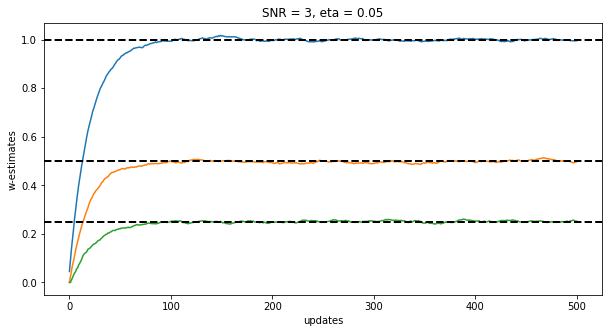

In [5]:
plt.figure(figsize=(10,5))
plt.plot(w_average1)
plt.title('SNR = 3, eta = 0.05')
plt.xlabel('updates')
plt.ylabel('w-estimates')
plt.axhline(1.0,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.5,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.25,color = 'k', linestyle = '--', linewidth = 2.0)
plt.show()

### SNR = 3 dB &emsp;eta = 0.15

In [10]:
eta = 0.15 #learning rate
L = 3 #taps
w = np.zeros(((matched_3_v.shape[0],matched_3_v.shape[1]+1,L)))
ww = np.zeros((matched_3_v.shape[1],3))
zhat = np.zeros((matched_3_v.shape[0],matched_3_v.shape[1]))

for i in range(matched_3_v.shape[0]):
    for j in range(matched_3_v.shape[1]):
        v = matched_3_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_3_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average2 = ww/600
e2 = np.reshape([y**2 for x in (matched_3_z - zhat) for y in x], (600, 501))
e2 = np.mean(e2, axis = 0)

Plot the learning curves

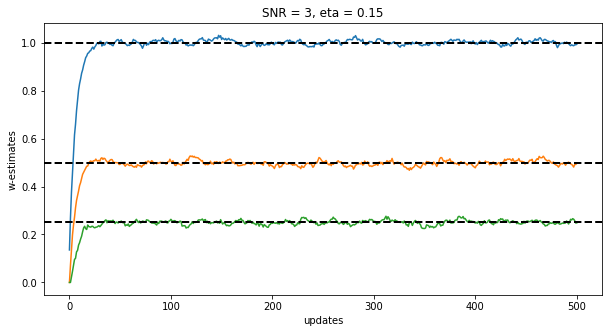

In [7]:
plt.figure(figsize=(10,5))
plt.plot(w_average2)
plt.title('SNR = 3, eta = 0.15')
plt.xlabel('updates')
plt.ylabel('w-estimates')
plt.axhline(1.0,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.5,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.25,color = 'k', linestyle = '--', linewidth = 2.0)
plt.show()

Plot the MSE for 3 dB

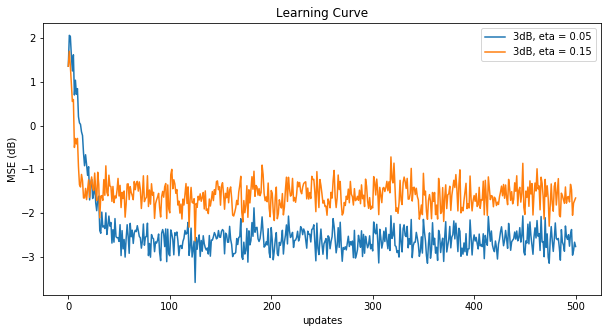

In [16]:
plt.figure(figsize=(10,5))
plt.plot(10*np.log10(e1), label = '3dB, eta = 0.05')
plt.plot(10*np.log10(e2), label = '3dB, eta = 0.15')
plt.legend()
plt.xlabel('updates')
plt.ylabel('MSE (dB)')
plt.title('Learning Curve')
plt.show()

### SNR = 10 dB &emsp;eta = 0.05

In [11]:
eta = 0.05 #learning rate
L = 3 #taps
w = np.zeros(((matched_10_v.shape[0],matched_10_v.shape[1]+1,L)))
ww = np.zeros((matched_10_v.shape[1],3))
zhat = np.zeros((matched_10_v.shape[0],matched_10_v.shape[1]))

for i in range(matched_10_v.shape[0]):
    for j in range(matched_10_v.shape[1]):
        v = matched_10_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_10_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average3 = ww/600
e3 = np.reshape([y**2 for x in (matched_10_z - zhat) for y in x], (600, 501))
e3 = np.mean(e3, axis = 0)

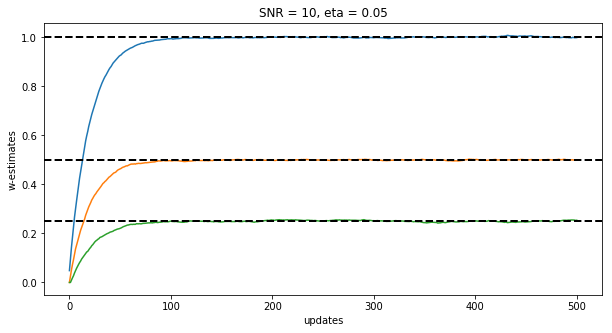

In [12]:
plt.figure(figsize=(10,5))
plt.plot(w_average3)
plt.title('SNR = 10, eta = 0.05')
plt.xlabel('updates')
plt.ylabel('w-estimates')
plt.axhline(1.0,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.5,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.25,color = 'k', linestyle = '--', linewidth = 2.0)
plt.show()

### SNR = 10 dB &emsp;eta = 0.15

In [13]:
eta = 0.15 #learning rate
L = 3 #taps
w = np.zeros(((matched_10_v.shape[0],matched_10_v.shape[1]+1,L)))
ww = np.zeros((matched_10_v.shape[1],3))
zhat = np.zeros((matched_10_v.shape[0],matched_10_v.shape[1]))

for i in range(matched_10_v.shape[0]):
    for j in range(matched_10_v.shape[1]):
        v = matched_10_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_10_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average4 = ww/600
e4 = np.reshape([y**2 for x in (matched_10_z - zhat) for y in x], (600, 501))
e4 = np.mean(e4, axis = 0)

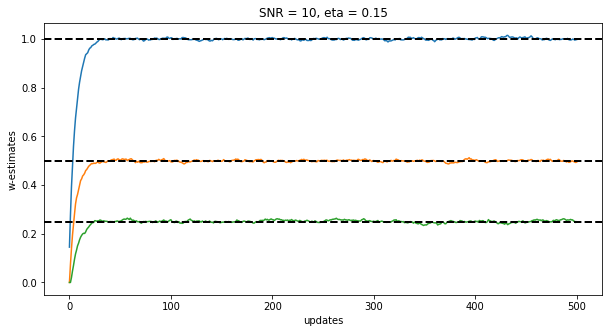

In [14]:
plt.figure(figsize=(10,5))
plt.plot(w_average4)
plt.title('SNR = 10, eta = 0.15')
plt.xlabel('updates')
plt.ylabel('w-estimates')
plt.axhline(1.0,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.5,color = 'k', linestyle = '--', linewidth = 2.0)
plt.axhline(0.25,color = 'k', linestyle = '--', linewidth = 2.0)
plt.show()

Plot the MSE for 10 dB

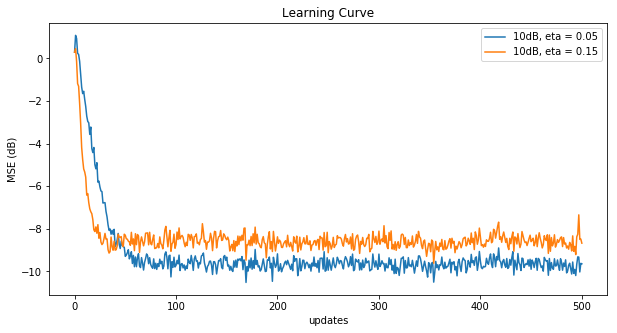

In [17]:
plt.figure(figsize=(10,5))
plt.plot(10*np.log10(e3), label = '10dB, eta = 0.05')
plt.plot(10*np.log10(e4), label = '10dB, eta = 0.15')
plt.legend()
plt.xlabel('updates')
plt.ylabel('MSE (dB)')
plt.title('Learning Curve')
plt.show()

## 2.c 

**How does the MSE for these learning curves compare to the LMMSE found in the
analytical part above? Note that you can also try using yn in place of zn if you would
like to explore (optional).**

Those LMMSE found in the analytical part above is pretty close to the MSE using eta = 0.05. And for eta = 0.15, the MSE is higher than LMMSE in the analytical part.

## 2.d

**What is the largest value of η that you can use without having divergent MSE?**

Conclusion:

For SNR = 3 dB, the largest eta can use is about 0.52

For SNR = 10 dB, the largest eta can use is about 0.55

In [28]:
eta = 0.52 #learning rate
L = 3 #taps
w = np.zeros(((matched_3_v.shape[0],matched_3_v.shape[1]+1,L)))
ww = np.zeros((matched_3_v.shape[1],3))
zhat = np.zeros((matched_3_v.shape[0],matched_3_v.shape[1]))

for i in range(matched_3_v.shape[0]):
    for j in range(matched_3_v.shape[1]):
        v = matched_3_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_3_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average5 = ww/600
e5 = np.reshape([y*y for x in (matched_3_z - zhat) for y in x], (600, 501))
e5 = np.mean(e5, axis = 0)

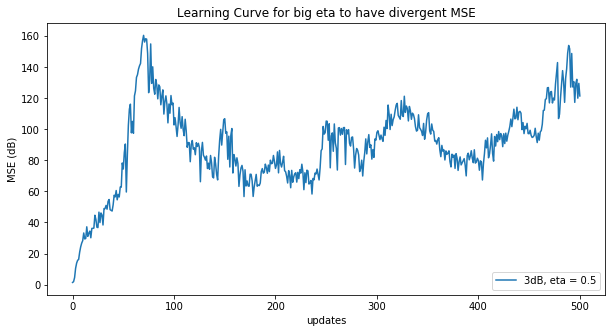

In [29]:
plt.figure(figsize=(10,5))
plt.plot(10*np.log10(e5), label = '3dB, eta = 0.5')
plt.legend()
plt.xlabel('updates')
plt.ylabel('MSE (dB)')
plt.title('Learning Curve for big eta to have divergent MSE')
plt.show()

In [26]:
eta = 0.55 #learning rate
L = 3 #taps
w = np.zeros(((matched_10_v.shape[0],matched_10_v.shape[1]+1,L)))
ww = np.zeros((matched_10_v.shape[1],3))
zhat = np.zeros((matched_10_v.shape[0],matched_10_v.shape[1]))

for i in range(matched_10_v.shape[0]):
    for j in range(matched_10_v.shape[1]):
        v = matched_10_v[i][j]
        zhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(matched_10_z[i][j]-zhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average6 = ww/600
e6 = np.reshape([y*y for x in (matched_10_z - zhat) for y in x], (600, 501))
e6 = np.mean(e6, axis = 0)

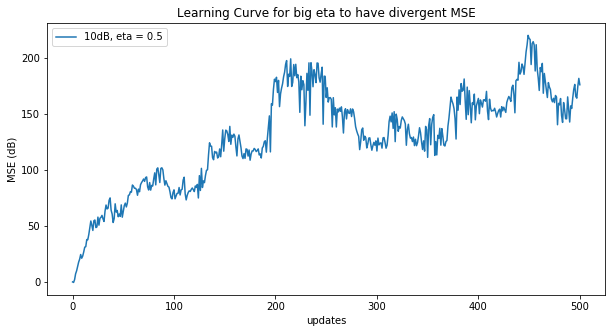

In [27]:
plt.figure(figsize=(10,5))
plt.plot(10*np.log10(e6), label = '10dB, eta = 0.5')
plt.legend()
plt.xlabel('updates')
plt.ylabel('MSE (dB)')
plt.title('Learning Curve for big eta to have divergent MSE')
plt.show()

## 3

In [15]:
with h5py.File('lms_fun_v3.hdf5', 'r') as hf:
    time_varying_coefficents = hf['timevarying_coefficents'][:]
    time_varying_x = hf['timevarying_x'][:]
    time_varying_y = hf['timevarying_y'][:]
    time_varying_z = hf['timevarying_z'][:]
for i in (time_varying_coefficents, time_varying_x, time_varying_y, time_varying_z):
    print('the shape is {}'.format(i.shape))

the shape is (501, 3)
the shape is (501,)
the shape is (501,)
the shape is (501,)


 Plot timevarying_coefficents vs. time (n)

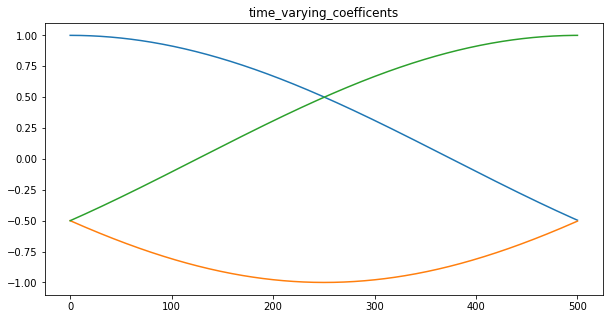

In [16]:
plt.figure(figsize=(10,5))
plt.plot(time_varying_coefficents)
plt.title('time_varying_coefficents')
plt.show()

In [17]:
# Adaptive filter
eta = 0.01 #learning rate
L = 3 #taps
v = np.zeros(L)
w = np.zeros((len(time_varying_y)+1,L))
w[0] = [1,-0.5,-0.5]
zhat = np.zeros_like(time_varying_y)
for i in range(len(time_varying_y)):
    v = np.roll(v,1) #shift indices to right
    v[0] = np.hstack((time_varying_x,[0,0]))[i] #insert new sample at beginning
    zhat[i] = np.dot(w[i],v)
    w[i+1] = w[i] + eta*(time_varying_y[i]-zhat[i])*v

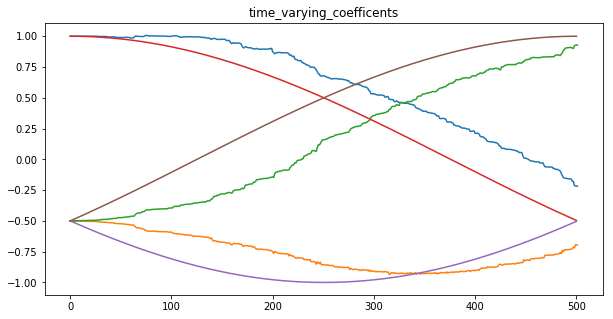

In [18]:
plt.figure(figsize=(10,5))
plt.plot(w)
plt.plot(time_varying_coefficents)
#plt.plot(time_varying_z)
plt.title('time_varying_coefficents')
plt.show()

## 4

**(a)&emsp;Run the LMS algorithm over all 600 sequences and plot the average learning curve for
a goods choice of η. Note: in this case, you only have access to yn, which may contain
noise.**

In [4]:
with h5py.File('lms_fun_v3.hdf5', 'r') as hf:
    mismatched_v = hf['mismatched_v'][:]
    mismatched_x = hf['mismatched_x'][:]
    mismatched_y = hf['mismatched_y'][:]
for i in (mismatched_v, mismatched_x, mismatched_y):
    print('the shape is {}'.format(i.shape))

the shape is (600, 501, 3)
the shape is (600, 501)
the shape is (600, 501)


In [5]:
eta = 0.015 #learning rate
L = 3 #taps
w = np.zeros(((mismatched_v.shape[0],mismatched_v.shape[1]+1,L)))
ww = np.zeros((mismatched_v.shape[1],3))
yhat = np.zeros((mismatched_v.shape[0],mismatched_v.shape[1]))

for i in range(mismatched_v.shape[0]):
    for j in range(mismatched_v.shape[1]):
        v = mismatched_v[i][j]
        yhat[i][j] = np.dot(w[i][j],v)
        w[i][j+1] = w[i][j] + eta*(mismatched_y[i][j]-yhat[i][j])*v
        # Adding all the w so we can do average later
        ww[j] =  ww[j] + w[i][j+1]
w_average7 = ww/600
e7 = np.reshape([y**2 for x in (mismatched_y - yhat) for y in x], (600, 501))
e7 = np.mean(e7, axis = 0)

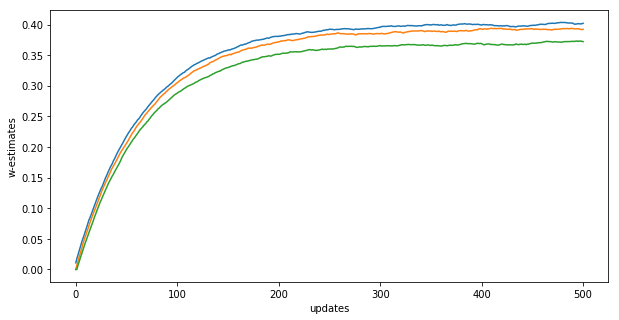

In [6]:
plt.figure(figsize=(10,5))
plt.plot(w_average7)
plt.xlabel('updates')
plt.ylabel('w-estimates')
plt.show()

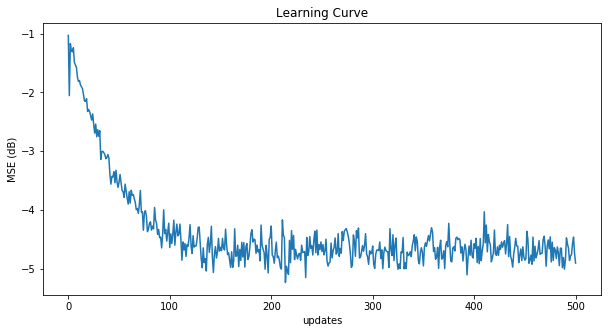

In [7]:
plt.figure(figsize=(10,5))
plt.plot(10*np.log10(e7))
plt.xlabel('updates')
plt.ylabel('MSE (dB)')
plt.title('Learning Curve')
plt.show()

**(b) &emsp;Using the entire data set, compute Rˆ
vn and ˆrn and the corresponding LLSE. Is this
lower than the LMS learning curve after convergence?**

In [8]:
df = np.vstack((np.hstack(([y[0] for i in range(600) for y in mismatched_v[i]])),np.hstack(([y[1] for i in range(600) for y in mismatched_v[i]]))
      ,np.hstack(([y[2] for i in range(600) for y in mismatched_v[i]])))).T

In [9]:
df.shape

(300600, 3)

In [10]:
# This is the estimate R_vn
R_vn = ( df.T @ df ) / 300600
R_vn

array([[ 1.00045756e+00, -5.39002475e-04,  1.86487799e-03],
       [-5.39002475e-04,  9.98711657e-01, -6.55304895e-04],
       [ 1.86487799e-03, -6.55304895e-04,  9.96783998e-01]])

In [11]:
# This is the estimate r_n
r_n = np.zeros(3)
r_n[0] = [y[0] for i in range(600) for y in mismatched_v[i]] @ np.reshape(mismatched_y,(300600,1)) / 300600
r_n[1] = [y[1] for i in range(600) for y in mismatched_v[i]] @ np.reshape(mismatched_y,(300600,1)) / 300600
r_n[2] = [y[2] for i in range(600) for y in mismatched_v[i]] @ np.reshape(mismatched_y,(300600,1)) / 300600
r_n

array([0.401296  , 0.38678905, 0.3700655 ])

In [12]:
from numpy.linalg import inv
r_y = (np.reshape(mismatched_y,(1,300600)) @ np.reshape(mismatched_y,(300600,1))).item(0) / 300600
LLSE = r_y ** 2 - (r_n * inv(np.matrix(R_vn)) * r_n.reshape(3,1)).item(0)
LLSE

0.15899191122806855

In [13]:
# convert the LLSE to dB
10*np.log10(LLSE)

-7.986249700089445

## Problem 4: MLP model exploration for the data from Problem 3

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [8]:
## RESHAPE mismatched_v and mismatched_y to V[300600][3] and y[300600]
V = np.vstack((np.hstack(([y[0] for i in range(600) for y in mismatched_v[i]])),np.hstack(([y[1] for i in range(600) for y in mismatched_v[i]]))
      ,np.hstack(([y[2] for i in range(600) for y in mismatched_v[i]])))).T
y = np.hstack([mismatched_y[i] for i in range(600)])

In [9]:
## 70/30 Testing And Training Split
V_train, V_test, y_train, y_test = train_test_split(V,y,test_size = 0.3,random_state = 126)

In [16]:
## Define Network
nn = MLPRegressor(hidden_layer_sizes = (5,3,),solver = 'lbfgs', activation='relu', alpha = 1e-4, random_state = 1)

In [17]:
## Train Network
nn.fit(V_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
import pickle
pickle.dump(nn, open('nn.pkl', 'wb'))

In [18]:
## Evaluate Network
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred = nn.predict(V_test)
print('r2_score is {}'.format(r2_score(y_test, pred)))
print('mean_squared_error is {}'.format(mean_squared_error(y_test, pred)))

r2_score is 0.9401352639489516
mean_squared_error is 0.04662212594686071


In [261]:
## Save the result
with h5py.File('coef_neural_network.hdf5', 'w') as hf:
    hf.create_dataset('coef1', data = nn.coefs_[0])
    hf.create_dataset('coef2', data = nn.coefs_[1])
    hf.create_dataset('coef3', data = nn.coefs_[2])
    hf.create_dataset('intercept1', data = nn.coefs_[0])
    hf.create_dataset('intercept2', data = nn.coefs_[1])
    hf.create_dataset('intercept3', data = nn.coefs_[2])

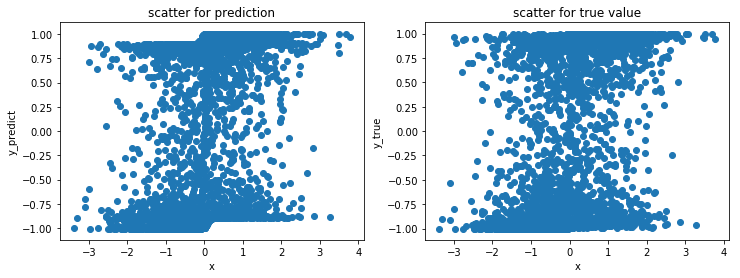

In [281]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter([x[0] for x in V_test[:4000]],pred[:4000])
# plt.scatter([x[1] for x in V_test[:4509]],pred[:4509])
# plt.scatter([x[2] for x in V_test[:45090]],pred[:45090])
plt.title('scatter for prediction')
plt.xlabel('x')
plt.ylabel('y_predict')
plt.subplot(122)
plt.scatter([x[0] for x in V_test[:4000]],y_test[:4000])
# plt.scatter([x[1] for x in V_test[:4509]],y_test[:4509])
# plt.scatter([x[2] for x in V_test[:45090]],y_test[:45090])
plt.title('scatter for true value')
plt.xlabel('x')
plt.ylabel('y_true')
plt.show()

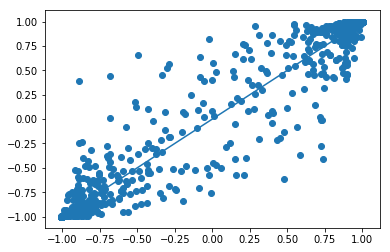

In [287]:
plt.figure()
plt.scatter(pred[:1000],y_test[:1000])
plt.plot(np.arange(-1,1,0.01),np.arange(-1,1,0.01))
plt.show()

## Problem 5: Lienar Classifier: Human vs Computer random sequences

## 1

In [14]:
with h5py.File('binary_random_sp2019.hdf5', 'r') as hf:
    human = hf['human'][:]
    machine = hf['machine'][:]
for i in (human, machine):
    print('the shape is {}'.format(i.shape))

the shape is (2400, 20)
the shape is (2400, 20)


In [20]:
human = (-1) ** human
machine = (-1) ** machine

y_human = np.ones( 2400 ) * (+1)
y_machine = np.ones( 2400 ) * (-1)

### combine the data
X = np.vstack( ( human, machine ) )
y = np.append( y_human, y_machine ) 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 0)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel = 'rbf', C = 1.0).fit(X_train,y_train)
accuracy_score(y_test, clf.predict(X_test))

0.6258333333333334

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train,y_train)
accuracy_score(y_test, clf.predict(X_test))
#print(clf.feature_importances_)

[0.04923738 0.04191931 0.04902903 0.03948364 0.05135342 0.05401041
 0.05547805 0.05712634 0.05486315 0.04652842 0.04842202 0.05372305
 0.05871585 0.05225923 0.05678779 0.0491865  0.04855742 0.04577934
 0.04984539 0.03769426]


In [62]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (10,6),solver = 'lbfgs', activation='relu', alpha = 1e-4, random_state = 1)
nn.fit(X_train,y_train)
accuracy_score(y_test, nn.predict(X_test))

0.5766666666666667

In [5]:
# with h5py.File('mnist_testdata.hdf5', 'r') as hf:
#     for key in hf.keys():
#         print(key)

xdata
ydata
